In [27]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA






1. Carga de datos:
- Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
- Asegúrate de que los datos no contengan valores nulos o atípicos.


In [17]:
ruta_archivo = '../ejercicios_core/data/Iris.csv'

df = utils.cargar_datos(ruta_archivo)

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iri

In [19]:
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
Id,150,0,0.0
SepalLengthCm,150,0,0.0
SepalWidthCm,150,0,0.0
PetalLengthCm,150,0,0.0
PetalWidthCm,150,0,0.0
Species,150,0,0.0


No se encuentran valores nulos

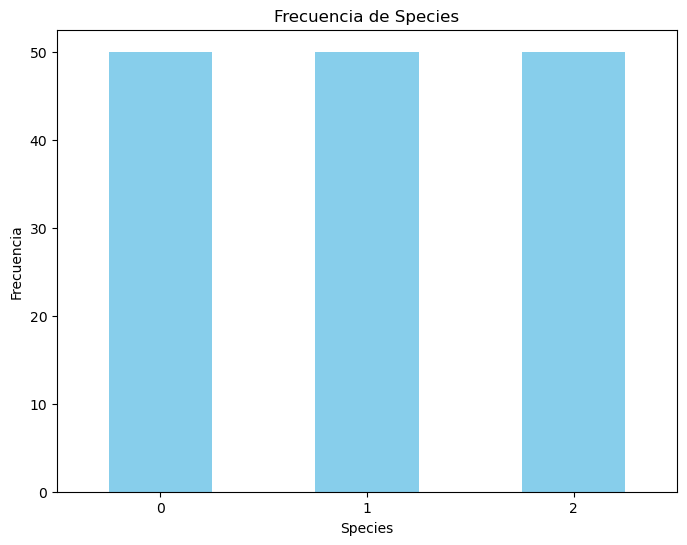

In [23]:
frecuencia = df['Species'].value_counts()
plt.figure(figsize=(8, 6))
frecuencia.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Species')
plt.xlabel('Species')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [21]:
## Se elimina columna ID , se modifica valor de Species con labelencoding
# Eliminar la columna 'Id'
df = df.drop('Id', axis=1)

# Crear y ajustar el LabelEncoder
encoder = LabelEncoder()

# Codificar la columna 'Species' y modificar los valores en el DataFrame
df['Species'] = encoder.fit_transform(df['Species'])

# Cambiar el tipo de datos de la columna 'Species' a int64
df['Species'] = df['Species'].astype('int64')

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


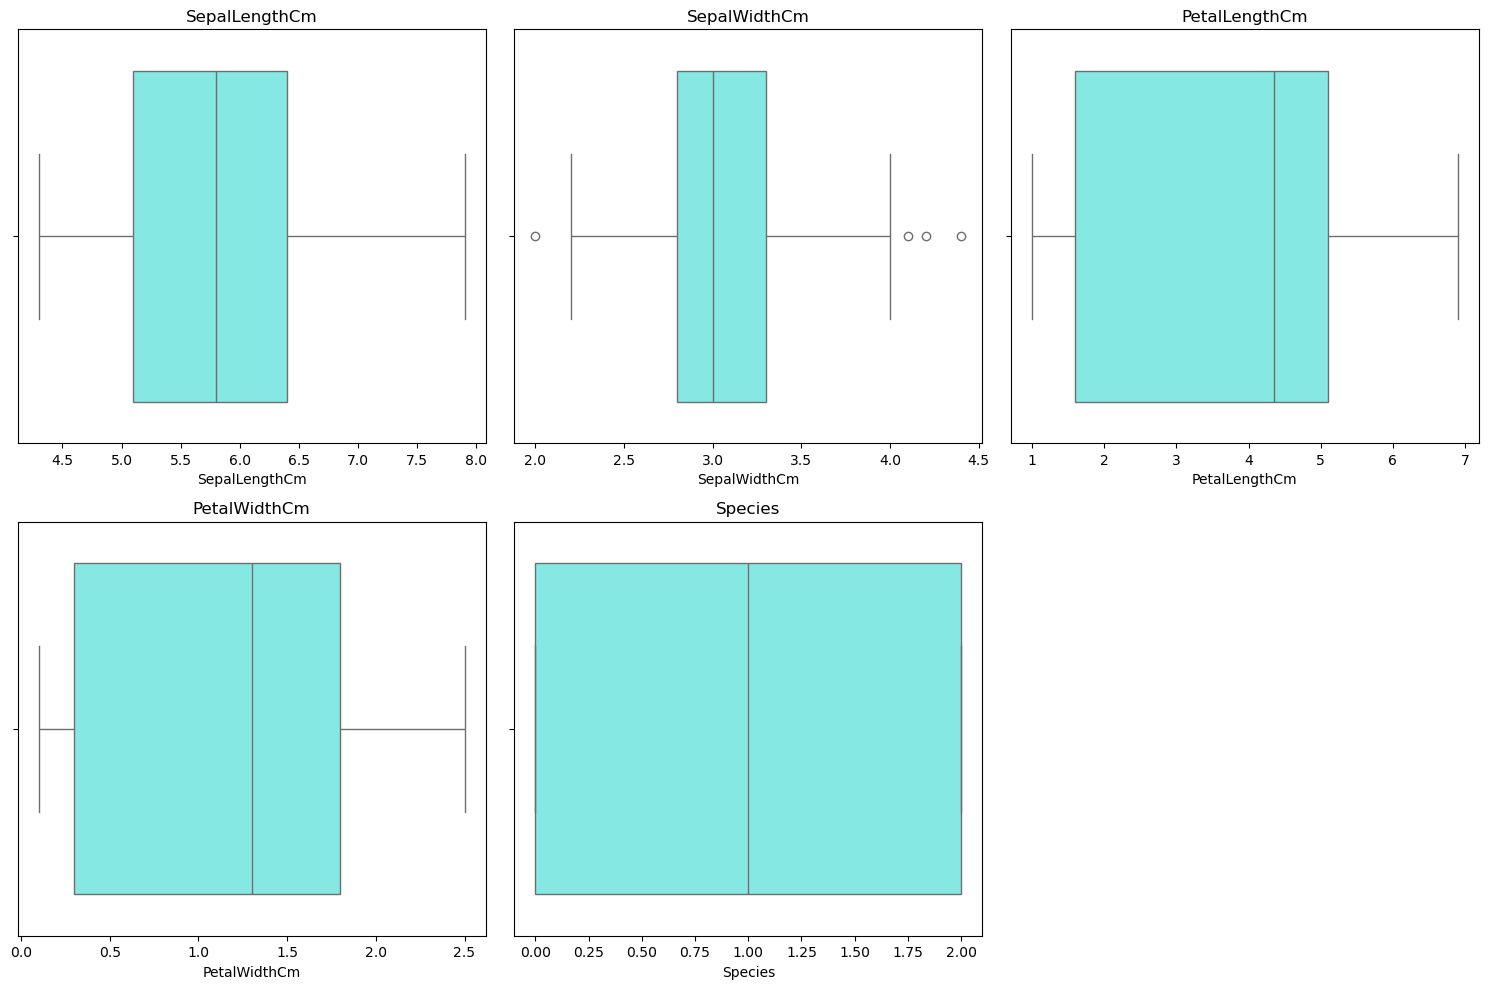

In [22]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,2,3,df)

Se encuentra valores outliers solo en SepaWithCM, los demas valores como el target species y sepalenght se ven balanceados, para los demas se ven ligeramente desbalanceado.

2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.


In [ ]:
#Separa el dato en X e y
X = df.drop(['Species'], axis=1)
y = df['Species']

# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:12]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:12]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1.]


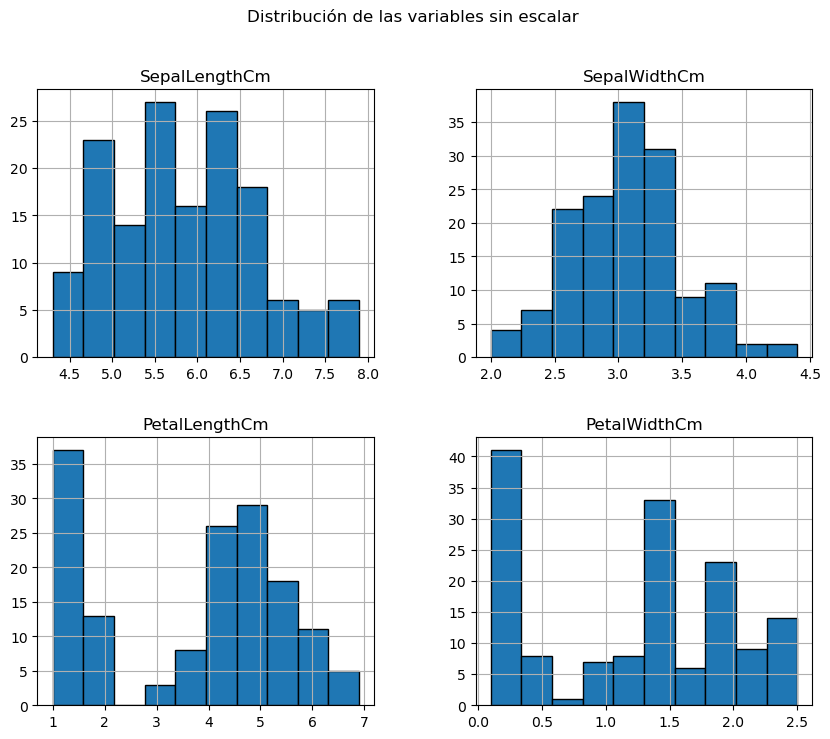

In [30]:
# Convertir el arreglo escalado en un DataFrame
X_initial = pd.DataFrame(X)
# Histograma para cada variable
X_initial.hist(bins=10, figsize=(10, 8), edgecolor='black')
plt.suptitle('Distribución de las variables sin escalar')
plt.show()

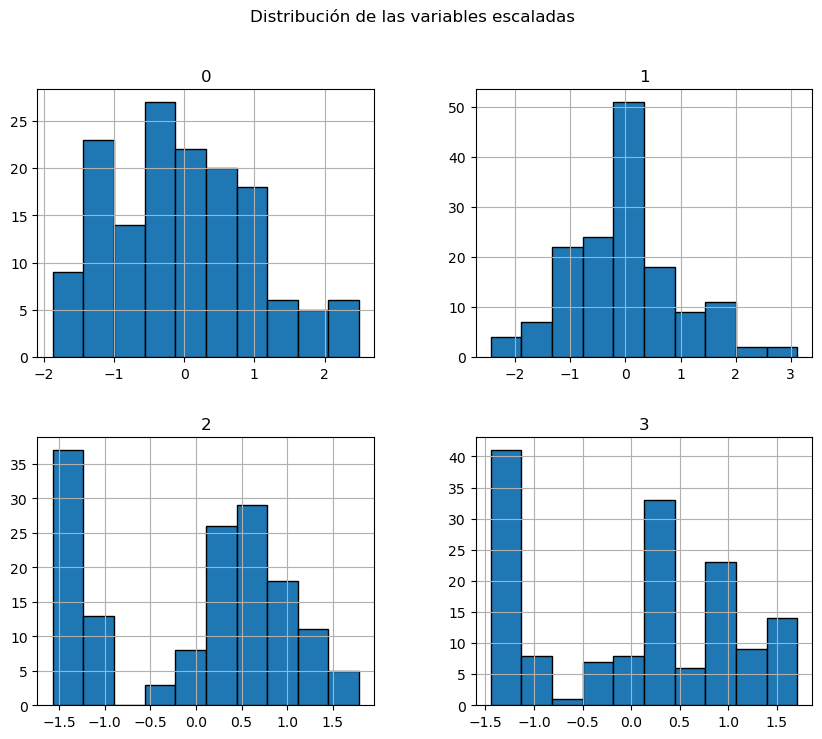

In [28]:
# Convertir el arreglo escalado en un DataFrame
scaled_df = pd.DataFrame(X_scaled)
# Histograma para cada variable
scaled_df.hist(bins=10, figsize=(10, 8), edgecolor='black')
plt.suptitle('Distribución de las variables escaladas')
plt.show()

In [31]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=2)
X_pca_2 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_7 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 2 componentes: {explained_variance_7:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_2.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 72.77%
Componente 2: 23.03%
Varianza explicada total con 2 componentes: 95.80%
Dimensiones originales: 4
Dimensiones reducidas: 2


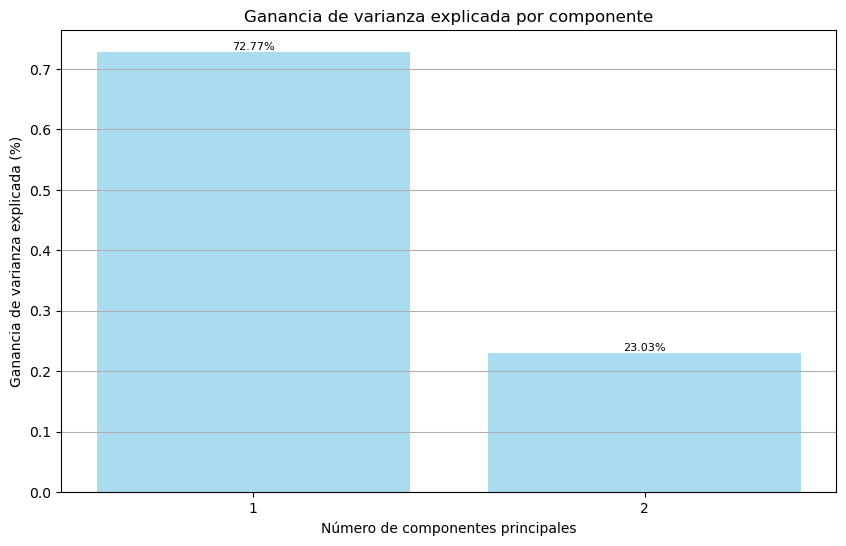

Ganancia de varianza explicada por componente:
Componente 1: 72.77%
Componente 2: 23.03%


In [42]:
# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_final.explained_variance_ratio_)
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_gain)+1), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, len(explained_variance_gain)+1))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.05  # Umbral de ganancia significativa (5%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

Para este caso dos componentes pueden capturar el 95.8% de varianza del total de los datos.


4. Visualización de los componentes principales:
- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.


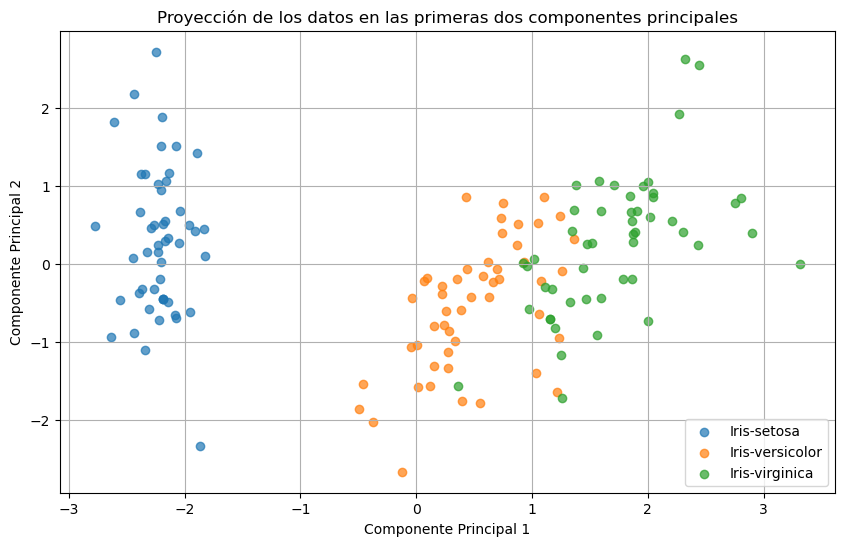

In [ ]:
# Diccionario para mapear los valores a los nombres de las especies
species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

target_names, count = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 6))

# Graficar los puntos para cada clase con su nombre mapeado
for i in range(len(target_names)):
    subset = X_pca_2[y == i][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=f'{species_map[i]}', alpha=0.7)

# Configuración de la gráfica
plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()  # Leyenda con nombres de las especies
plt.grid(True)
plt.show()

nterpretación actualizada con los datos de varianza explicada:
1. Ganancia de varianza explicada

La Componente Principal 1 (PC1) explica el 72.77% de la varianza total de los datos.
Esto significa que la mayor parte de la información en el dataset está representada por esta componente, y probablemente está dominada por las características más relevantes (como las dimensiones de los pétalos, que suelen ser determinantes en el dataset Iris).

La Componente Principal 2 (PC2) explica el 23.03% de la varianza total.
Junto con PC1, las dos primeras componentes explican 95.80% de la varianza. Esto es bastante alto y justifica el uso de solo dos componentes para visualizar los datos en 2D.

2. Importancia de cada componente

- PC1: Es la dirección principal que captura la mayor variabilidad en los datos. En el caso del dataset Iris, es probable que las variables PetalLengthCm y PetalWidthCm tengan un peso significativo, ya que estas características son claves para distinguir entre las especies.
- PC2: Captura variabilidad adicional, posiblemente relacionada con las variables SepalLengthCm y SepalWidthCm, que ayudan a diferenciar entre Iris-versicolor y Iris-virginica.

3. Separación de clases

- Iris-setosa:
Se observa claramente separada a lo largo de PC1, lo que indica que la primera componente principal captura características que la diferencian fuertemente de las otras especies.
- Iris-versicolor y Iris-virginica:
Estas dos clases tienen una superposición parcial a lo largo de PC2. Aunque aún hay cierta separación en PC2, la proximidad sugiere que estas especies son más similares entre sí y que PCA no es completamente efectivo para separarlas linealmente en 2D.

